In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# each point is length, width & type (0.1)
data = [[3, 1.5, 1],
        [2, 1, 0],
        [4, 1.5, 1],
        [3, 1, 0],
        [3.5, .5, 1],
        [2, .5, 0],
        [5.5, 1, 1],
        [1, 1, 0]]

mystery_flower = [4.5, 1]

In [4]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

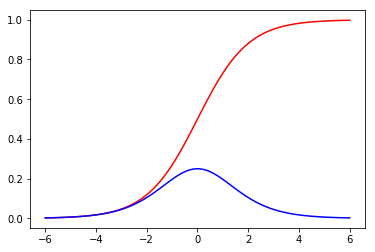

In [5]:
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

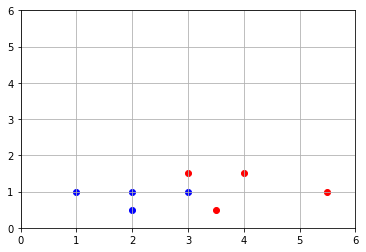

In [6]:
# scatter data
plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)) :
    point = data[i]
    color = "r"
    if point[2] == 0 :
        color = "b"
    plt.scatter(point[0], point[1], c=color)

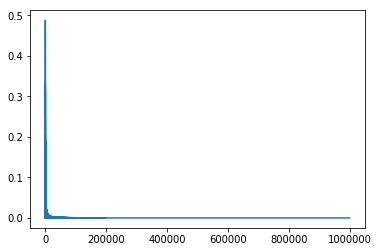

In [7]:
# training loop
learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(100000000) :
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    prediction = sigmoid(z)
    
    target = point[2]
    cost = np.square(prediction - target)
    
    dcost_prediction = 2 * (prediction -target)
    dprediction_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_prediction * dprediction_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            prediction = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(data))

plt.plot(costs)

In [8]:
# prediction

for i in range(len(data)) :
    point = data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + b
    prediction = sigmoid(z)
    print("prediction : {}" .format(prediction))

[3, 1.5, 1]
prediction : 0.9949027358265332
[2, 1, 0]
prediction : 8.899793111994709e-21
[4, 1.5, 1]
prediction : 1.0
[3, 1, 0]
prediction : 0.007002856060508033
[3.5, 0.5, 1]
prediction : 0.9956106021138604
[2, 0.5, 0]
prediction : 3.2156119091499654e-25
[5.5, 1, 1]
prediction : 1.0
[1, 1, 0]
prediction : 1.1231367076037748e-38


In [9]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
prediction = sigmoid(z)
prediction

1.0

In [10]:
def which_flower(length, width) :
    z = length * w1 + width * w2 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print('blue')
    else:
        print('red')

In [11]:
which_flower(4.5, 1)

red
